In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('flowers.csv')

In [3]:
# Print the first few rows of the dataset
print(df.head())

  Species  SepalLength  SepalWidth  PetalLength  PetalWidth
0  Setosa          5.1         3.5          1.4         0.2
1  Setosa          4.9         3.0          1.4         0.2
2  Setosa          4.7         3.2          1.3         0.2
3  Setosa          4.6         3.1          1.5         0.2
4  Setosa          5.0         3.6          1.4         0.2


In [4]:
# Separating out the features and the target
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
x = df.loc[:, features].values
y = df.loc[:, ['Species']].values

In [5]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
# Performing PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [7]:
# Creating a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [8]:
# Concatenating the principal components with the target (species)
final_df = pd.concat([principal_df, df[['Species']]], axis=1)

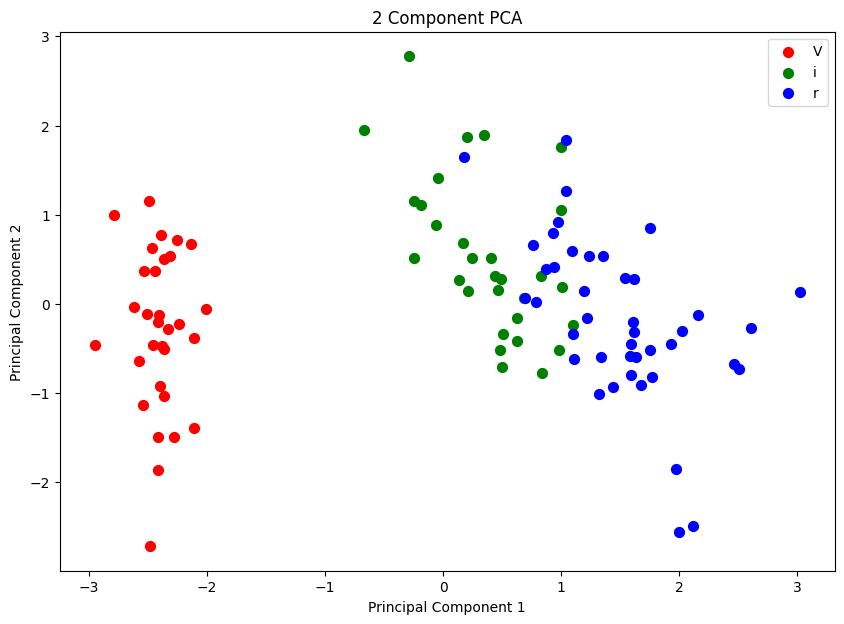

In [9]:
# Visualizing the PCA results
plt.figure(figsize=(10, 7))
species = ['Setosa', 'Versicolor', 'Virginica']
colors = ['r', 'g', 'b']

for species, color in zip(species, colors):
    indices_to_keep = final_df['Species'] == species
    plt.scatter(final_df.loc[indices_to_keep, 'Principal Component 1'],
                final_df.loc[indices_to_keep, 'Principal Component 2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(species)
plt.title('2 Component PCA')
plt.show()